In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



In [19]:
# fais une dataframe avec les données de test
df_test = pd.read_csv('Dataset/Training_Set/Training_Set/RFMiD_Training_Labels.csv')

In [20]:
df_test.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#fais une fonction qui permet d'afficher les images en focntion de leur ID
def show_img(id):
    img = plt.imread('Dataset/Training_Set/Training_Set/Training/{}.png'.format(id))
    plt.imshow(img)
    plt.show()


In [22]:
#clean the data completely all 

df_test = df_test.dropna()
df_test.head()






,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


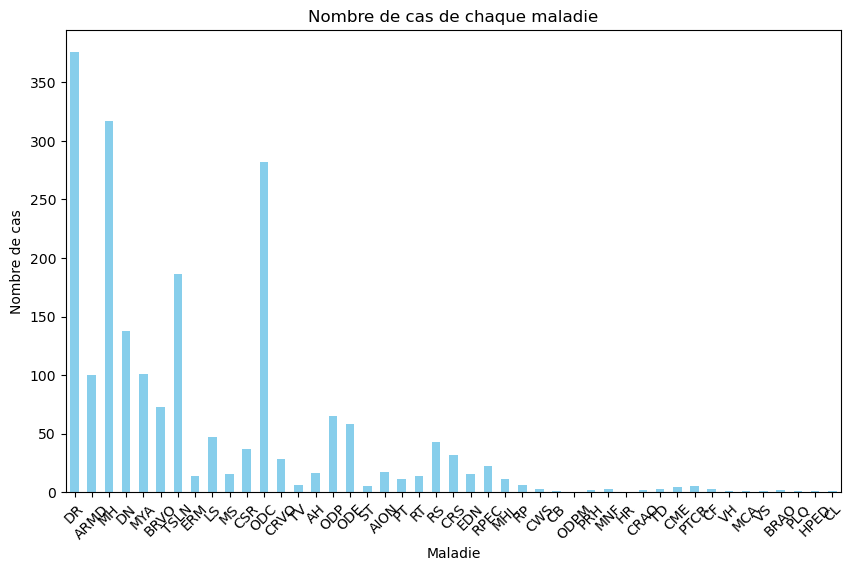

In [26]:
# Calculer le nombre de cas de chaque maladie
disease_counts = df_test.iloc[:, 2:].sum()

# Créer un graphique à barres pour afficher les résultats
plt.figure(figsize=(10, 6))
disease_counts.plot(kind='bar', color='skyblue')
plt.title('Nombre de cas de chaque maladie')
plt.xlabel('Maladie')
plt.ylabel('Nombre de cas')
plt.xticks(rotation=45)
plt.show()

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Créez un modèle séquentiel
model = keras.Sequential()

# Couche de convolution 2D avec 32 filtres, une taille de noyau de 3x3, une fonction d'activation ReLU et une entrée de forme (largeur, hauteur, canaux)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))

# Couche de pooling pour réduire la dimension spatiale
model.add(layers.MaxPooling2D((2, 2)))

# Ajoutez plus de couches de convolution et de pooling si nécessaire

# Aplatir les données
model.add(layers.Flatten())

# Couche entièrement connectée avec 128 neurones
model.add(layers.Dense(128, activation='relu'))

# Couche de sortie avec le nombre de classes
model.add(layers.Dense(44, activation='softmax'))

# Compilez le modèle avec une fonction de perte, un optimiseur et des métriques
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Affichez un résumé du modèle
model.summary()



Model: "sequential_1"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_1 (Dense)             (None, 128)               3936384   
                                                                 
 dense_2 (Dense)             (None, 44)                5676      
                                                                 
Total params: 3942956 (15.04 MB)
Trainable params: 3942956 (15.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
